# Selecting Dataset - Sleem in Mammals



In [1]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("volkandl/sleep-in-mammals")

print("Path to dataset files:", path)


c:\Users\matan\anaconda3\envs\python_tutorial\lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


Path to dataset files: C:\Users\matan\.cache\kagglehub\datasets\volkandl\sleep-in-mammals\versions\1


In [2]:
import pandas as pd
# !pip install seaborn
import seaborn as sns

import matplotlib.pyplot as plt
import kagglehub

# Download latest version
path = kagglehub.dataset_download("volkandl/sleep-in-mammals")

# Load the dataset
df = pd.read_csv(f"{path}/mammals.csv")

missing_values = df.isnull().sum()
print(missing_values)



species          0
body_wt          0
brain_wt         0
non_dreaming    14
dreaming        12
total_sleep      4
life_span        4
gestation        4
predation        0
exposure         0
danger           0
dtype: int64


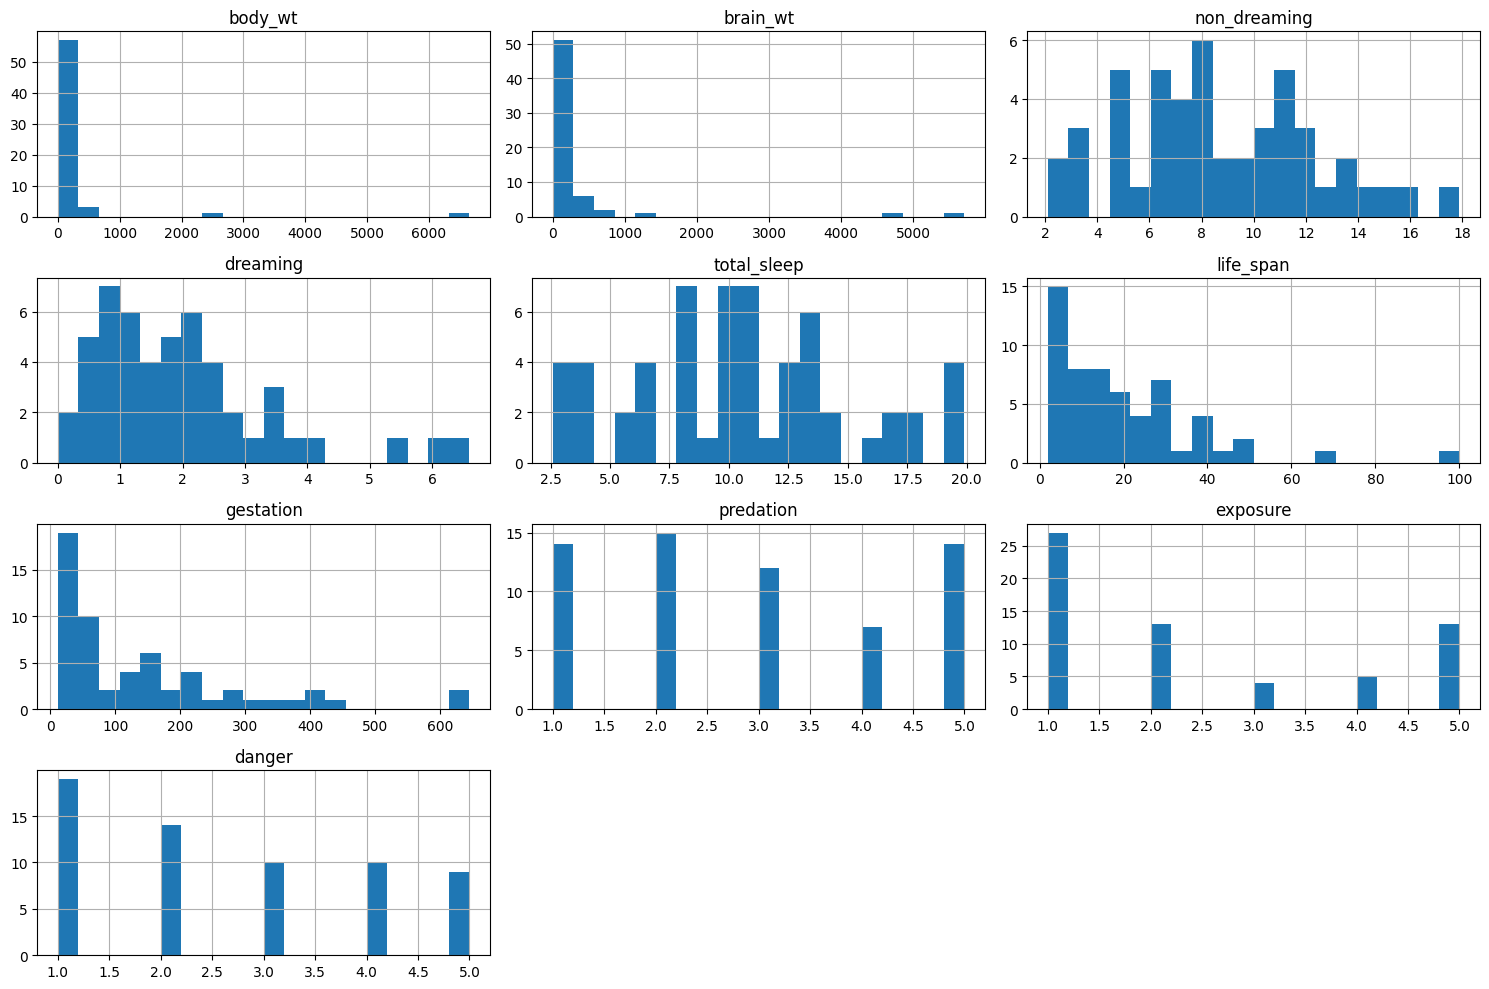

In [3]:
df.hist(figsize=(15, 10), bins=20)
plt.tight_layout()
plt.show()

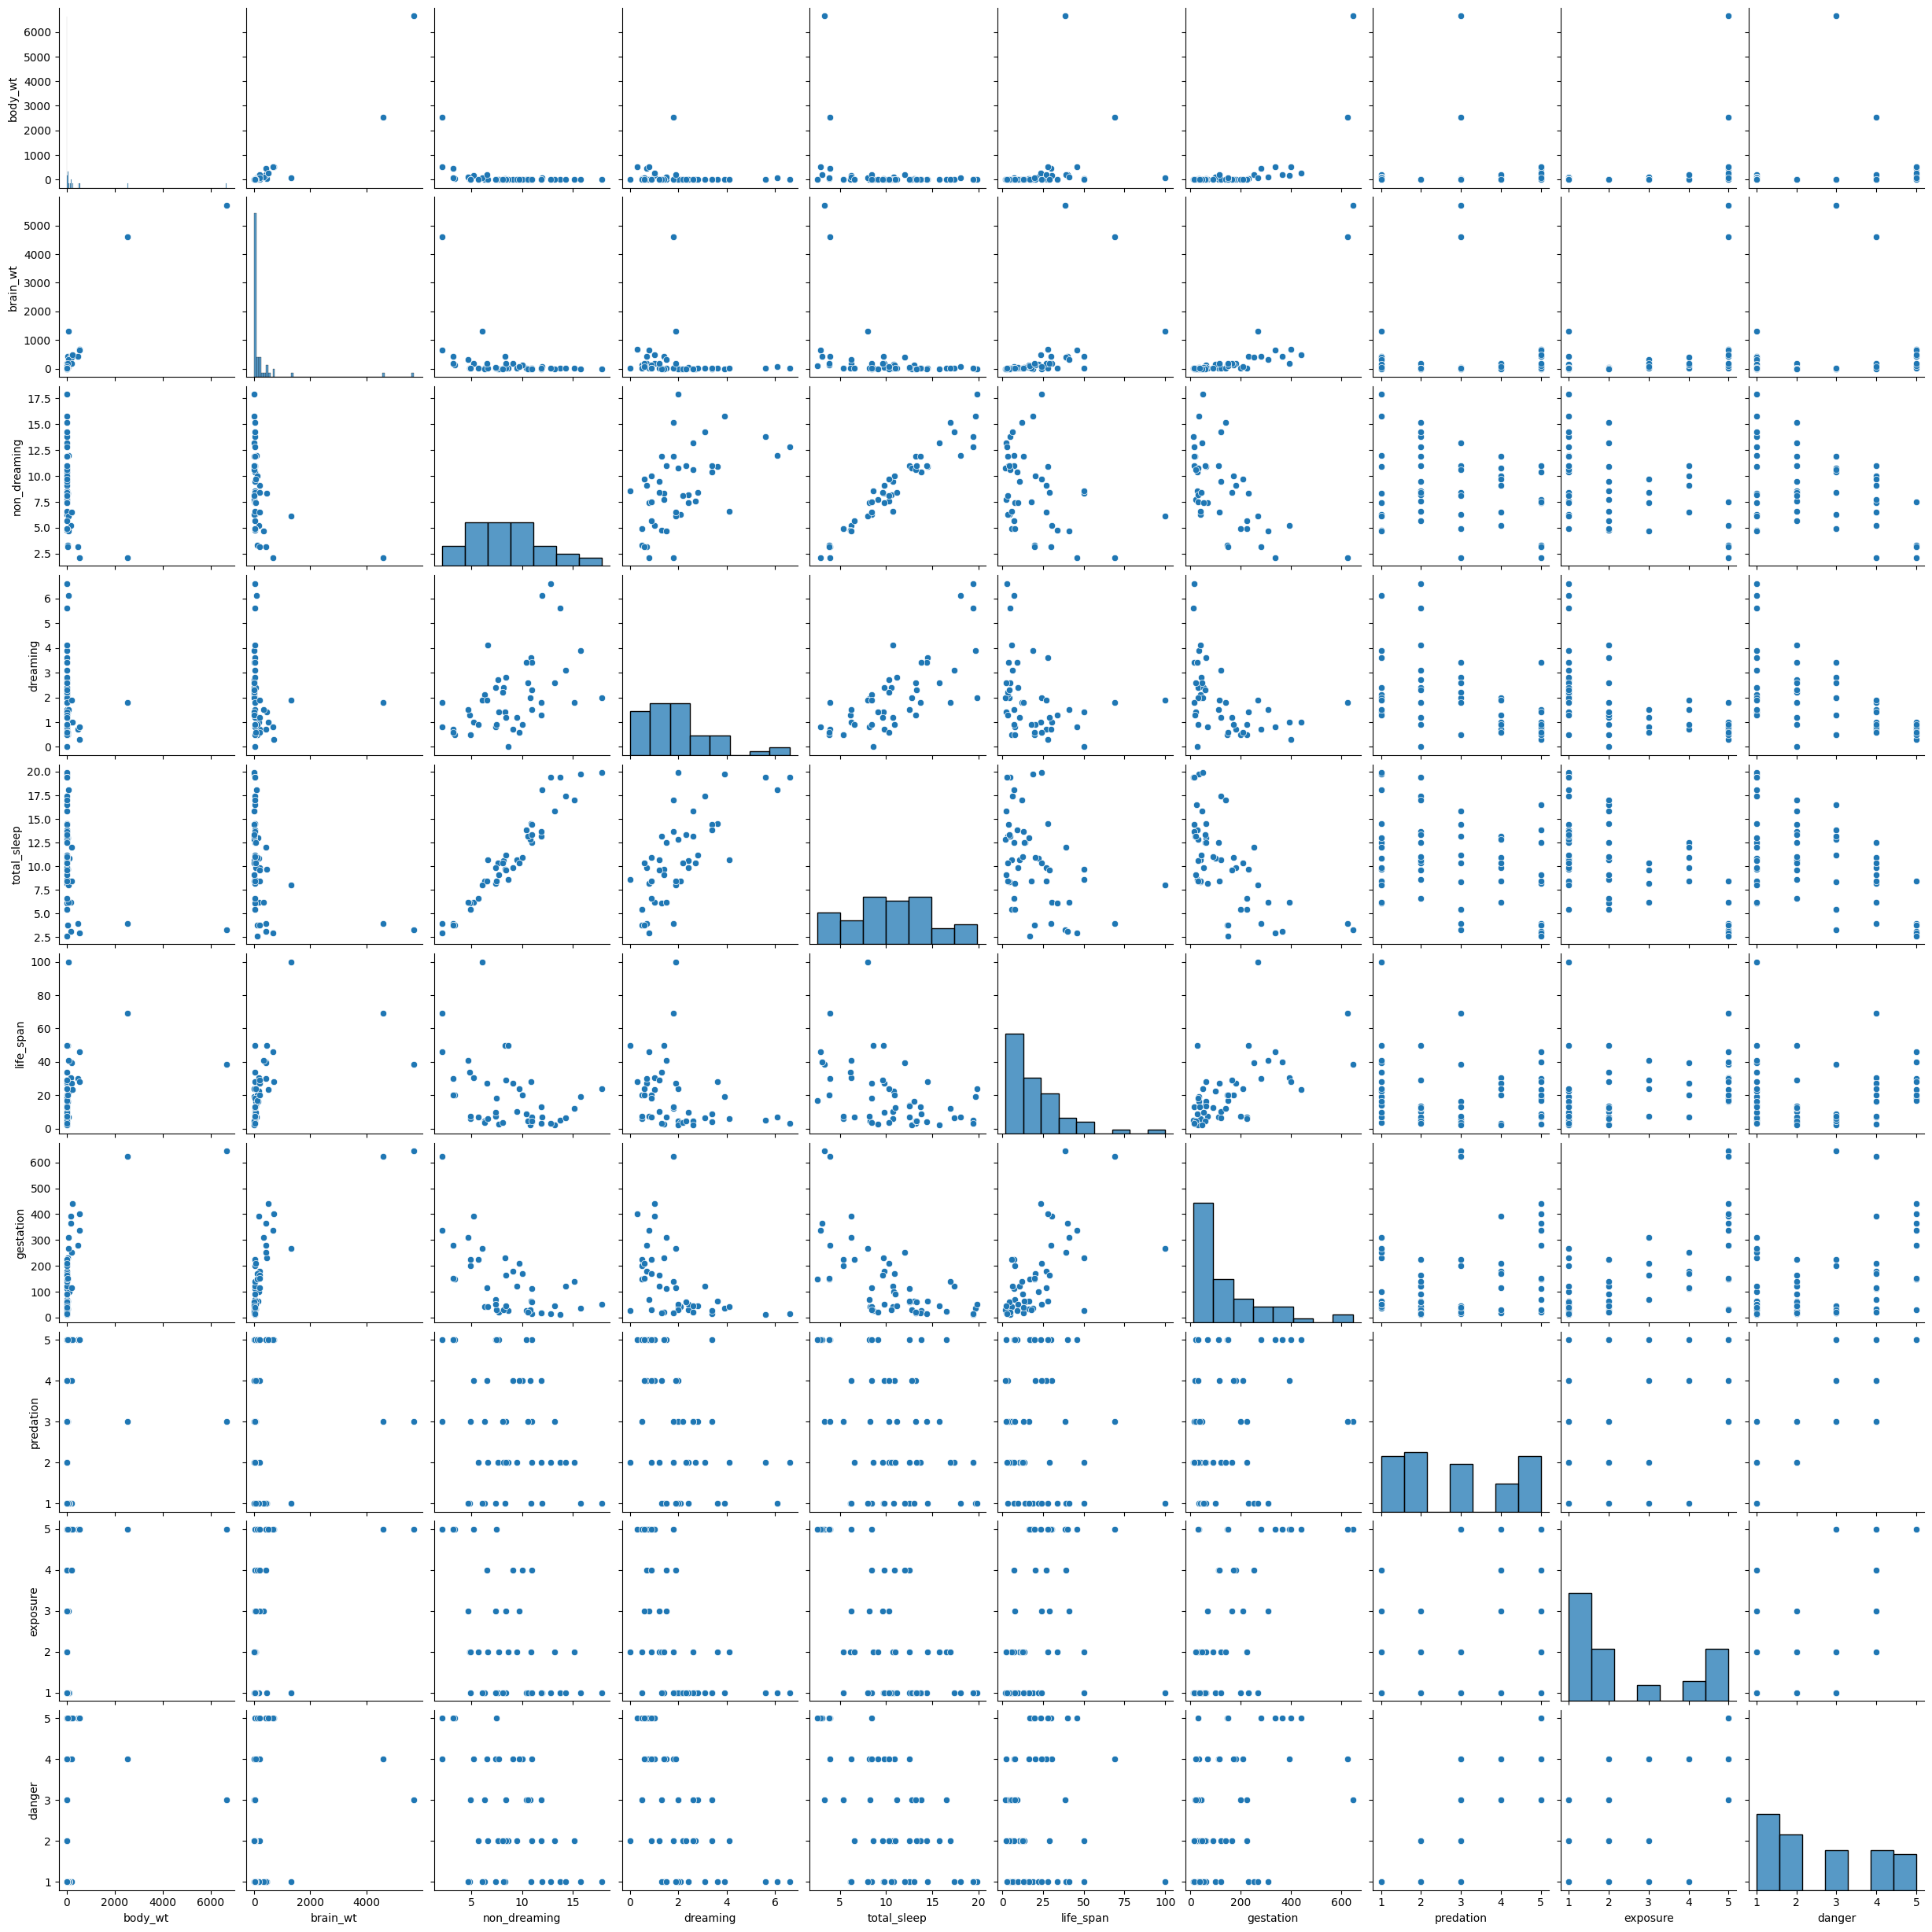

In [4]:
sns.pairplot(df)
plt.show()

In [5]:
def df_missing_value_indicator(df, feature_name):
    missing_indicator_name = f"{feature_name}_missing_indicator"
    df[missing_indicator_name] = df[feature_name].isnull().astype(int)
    return df

df_dreaming_indicator = df_missing_value_indicator(df, "dreaming")
df_no_null = df_dreaming_indicator.dropna(axis=0)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


def train_logistic_regression(X, y):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

    # Create and train the logistic regression model
    log_reg = LogisticRegression(max_iter=1000)
    log_reg.fit(X_train, y_train)

    # Make predictions
    y_pred = log_reg.predict(X_test)

    # Evaluate the model
    accuracy = accuracy_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)
    class_report = classification_report(y_test, y_pred)

    print(f"Accuracy: {accuracy}")
    print("Confusion Matrix:")
    print(conf_matrix)
    print("Classification Report:")
    print(class_report)


# Define the features and target variable
X = df_no_null.drop(columns=['species', 'danger'])
y_train = df_no_null['danger']
train_logistic_regression(X, y_train)


Accuracy: 0.6153846153846154
Confusion Matrix:
[[2 0 0 0 0]
 [0 2 0 1 0]
 [0 0 0 0 0]
 [0 0 2 2 1]
 [0 0 1 0 2]]
Classification Report:
              precision    recall  f1-score   support

           1       1.00      1.00      1.00         2
           2       1.00      0.67      0.80         3
           3       0.00      0.00      0.00         0
           4       0.67      0.40      0.50         5
           5       0.67      0.67      0.67         3

    accuracy                           0.62        13
   macro avg       0.67      0.55      0.59        13
weighted avg       0.79      0.62      0.68        13



c:\Users\matan\anaconda3\envs\python_tutorial\lib\site-packages\sklearn\linear_model\_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
c:\Users\matan\anaconda3\envs\python_tutorial\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\matan\anaconda3\envs\python_tutorial\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetric

In [7]:
df_dreaming_indicator.columns


Index(['species', 'body_wt', 'brain_wt', 'non_dreaming', 'dreaming',
       'total_sleep', 'life_span', 'gestation', 'predation', 'exposure',
       'danger', 'dreaming_missing_indicator'],
      dtype='object')

In [27]:
def balance_df(df, column_name):
# Separate the rows where dreaming_missing_indicator is 1 and 0
    df_1 = df[df[column_name] == 1]
    df_0 = df[df[column_name] == 0]

    # Calculate the number of rows to duplicate
    num_to_duplicate = len(df_0) - len(df_1)

    # Duplicate the rows
    df_1_duplicated = df_1.sample(n=num_to_duplicate, replace=True)

    # Concatenate the original dataframe with the duplicated rows
    df_balanced = pd.concat([df, df_1_duplicated])

    # Shuffle the dataframe
    df_balanced = df_balanced.sample(frac=1).reset_index(drop=True)

    print(df_balanced[column_name].value_counts())
    return df_balanced

0    50
1    50
Name: dreaming_missing_indicator, dtype: int64


In [ ]:
missing_columns = ['dreaming', 'non_dreaming', 'total_sleep', 'life_span', 'gestation']
for column in missing_columns:
    print('trying to predict:', column)
    df_with_indicator = df_missing_value_indicator(df, column)
    df_balanced = df_with_indicator.copy()
    X = df_balanced.drop(columns=['species', 'danger', column, f'{column}_missing_indicator'])
    X  = X.fillna(X.mean())
    y_train = df_balanced['dreaming_missing_indicator']
    train_logistic_regression(X, y_train)
    print('\n\n')

c:\Users\matan\anaconda3\envs\python_tutorial\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\matan\anaconda3\envs\python_tutorial\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\matan\anaconda3\envs\python_tutorial\lib\site-packages\sklearn\metrics\_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(r

trying to predict: dreaming
Accuracy: 0.6842105263157895
Confusion Matrix:
[[13  0]
 [ 6  0]]
Classification Report:
              precision    recall  f1-score   support

           0       0.68      1.00      0.81        13
           1       0.00      0.00      0.00         6

    accuracy                           0.68        19
   macro avg       0.34      0.50      0.41        19
weighted avg       0.47      0.68      0.56        19




trying to predict: non_dreaming
Accuracy: 0.7894736842105263
Confusion Matrix:
[[12  1]
 [ 3  3]]
Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.92      0.86        13
           1       0.75      0.50      0.60         6

    accuracy                           0.79        19
   macro avg       0.78      0.71      0.73        19
weighted avg       0.78      0.79      0.78        19




trying to predict: total_sleep
Accuracy: 0.8421052631578947
Confusion Matrix:
[[12  1]
 [ 2  4]]
Class

# Wine Quality Database

In [9]:
import kagglehub
import pandas as pd
import seaborn as sns
from xgboost import XGBClassifier
import optuna
from sklearn.model_selection import train_test_split, cross_val_score
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
import warnings 
warnings.filterwarnings('ignore')


# Download latest version
path = kagglehub.dataset_download("taweilo/wine-quality-dataset-balanced-classification")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\matan\.cache\kagglehub\datasets\taweilo\wine-quality-dataset-balanced-classification\versions\1


In [10]:
wine_df = pd.read_csv(f"{path}/wine_data.csv")
wine_df.describe()

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
count,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000,21000.000000
mean,9.797079,0.774796,0.793870,31.289348,0.200245,129.442333,229.008762,1.009972,3.158712,1.020641,11.291716,6.000000
std,2.413919,0.365015,0.384833,19.015391,0.124933,77.167262,100.183265,0.012032,0.171371,0.408304,1.182198,2.000048
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,7.600000,0.430000,0.410000,9.800000,0.072000,45.000000,150.000000,0.997417,3.030000,0.620000,10.400000,4.000000
50%,10.000000,0.830000,0.870000,37.600000,0.205000,145.800000,240.500000,1.012200,3.150000,1.080000,11.300000,6.000000
75%,11.800000,1.080000,1.110000,46.800000,0.298000,194.325000,311.625000,1.019840,3.270000,1.360000,12.200000,8.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000


<AxesSubplot:>

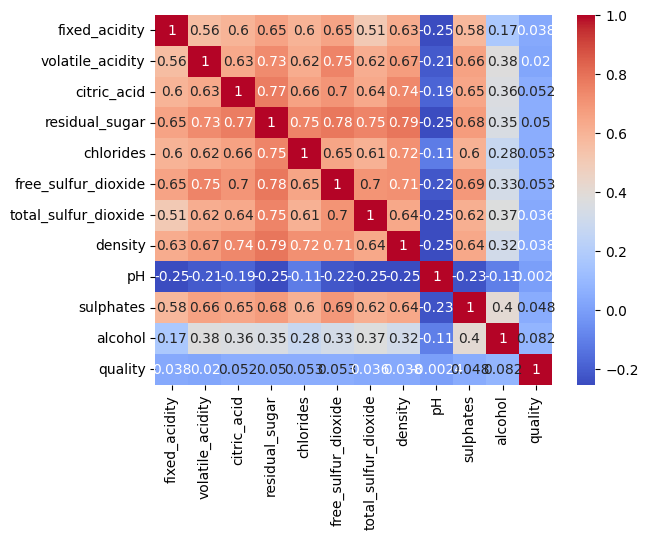

In [11]:
sns.heatmap(wine_df.corr(), annot=True, cmap='coolwarm')

In [ ]:
y_train = wine_df['quality']
y_train = y_train-3
X = wine_df.drop(columns=['quality'])
X_train, X_test, y_train, y_test = train_test_split(X, y_train, test_size=0.2, random_state=42)

# Define objective function for Optuna optimization
def objective(trial):
    # Hyperparameter search space
    param_grid = {
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'learning_rate': trial.suggest_float('learning_rate', 0.01, 0.3),
        'n_estimators': trial.suggest_int('n_estimators', 50, 200),
        'subsample': trial.suggest_float('subsample', 0.6, 1.0),
        'colsample_bytree': trial.suggest_float('colsample_bytree', 0.6, 1.0),
        'gamma': trial.suggest_float('gamma', 0, 1),
        'reg_alpha': trial.suggest_float('reg_alpha', 0, 1),
        'reg_lambda': trial.suggest_float('reg_lambda', 0.1, 1)
    }
    
    # Create and train the XGBClassifier with the suggested hyperparameters
    model = XGBClassifier(
        objective='multi:softmax',  # For multiclass classification
        num_class=7,               # Number of classes
        eval_metric='mlogloss',     # Multiclass log loss
        use_label_encoder=False,   # Avoid warnings in newer XGBoost versions
        **param_grid
    )
    
    # Cross-validation for performance estimation
    score = cross_val_score(model, X_train, y_train, cv=5, scoring='accuracy')
    return score.mean()  # Return the mean accuracy

# Set up and run Optuna study
study = optuna.create_study(direction='maximize')  # We want to maximize accuracy
study.optimize(objective, n_trials=10)  # Perform optimization over 50 trials

# Get the best hyperparameters found by Optuna
best_params = study.best_params
print(f"Best Hyperparameters: {best_params}")

[I 2025-01-20 10:35:03,734] A new study created in memory with name: no-name-0cde3055-63bb-4c8b-878b-e1ecdcb2b011
[I 2025-01-20 10:35:17,555] Trial 0 finished with value: 0.5573214285714285 and parameters: {'max_depth': 9, 'learning_rate': 0.23403277692287972, 'n_estimators': 51, 'subsample': 0.6940279227731778, 'colsample_bytree': 0.8292487141696132, 'gamma': 0.21286736093587943, 'reg_alpha': 0.2837542211608449, 'reg_lambda': 0.5211073552281064}. Best is trial 0 with value: 0.5573214285714285.
[I 2025-01-20 10:35:25,510] Trial 1 finished with value: 0.37898809523809524 and parameters: {'max_depth': 5, 'learning_rate': 0.047222938085877325, 'n_estimators': 64, 'subsample': 0.9199000633293041, 'colsample_bytree': 0.8787504095458353, 'gamma': 0.5713053721563086, 'reg_alpha': 0.1033214390734708, 'reg_lambda': 0.4793751270802543}. Best is trial 0 with value: 0.5573214285714285.
[I 2025-01-20 10:35:31,542] Trial 2 finished with value: 0.38208333333333333 and parameters: {'max_depth': 4, 'le

Best Hyperparameters: {'max_depth': 7, 'learning_rate': 0.287464135132791, 'n_estimators': 88, 'subsample': 0.7987587662256227, 'colsample_bytree': 0.6696590246320745, 'gamma': 0.08140219470090626, 'reg_alpha': 0.5081422117787152, 'reg_lambda': 0.2871287277869458}


In [13]:
# Train the model with the best hyperparameters
# best_params =  {'max_depth': 10, 'learning_rate': 0.23823396572274735, 'n_estimators': 141, 'subsample': 0.8506979064285252, 'colsample_bytree': 0.821175777812565, 'gamma': 0.25413966716433245, 'reg_alpha': 0.736930567486492, 'reg_lambda': 0.34870051923508893}
best_model = XGBClassifier(
    objective='multi:softmax', 
    num_class=7, 
    eval_metric='mlogloss', 
    use_label_encoder=False,
    **best_params
)

best_model.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"Test Accuracy: {accuracy:.2f}")

Test Accuracy: 0.60


# Energy Consumption - Database

1000


<AxesSubplot:>

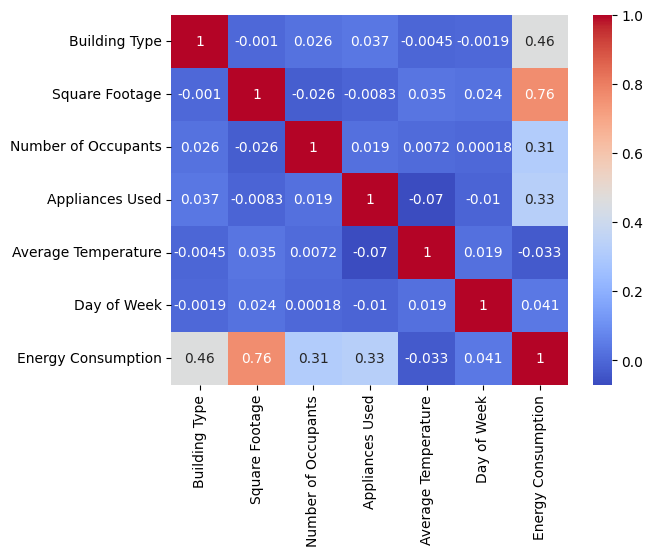

In [45]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, accuracy_score
from sklearn.model_selection import train_test_split, cross_val_score
import os

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))
        
file_path = "/kaggle/input/energy-consumption-dataset-linear-regression/test_energy_data.csv"
# train_path = "input\energy_consumtion\\train_energy_data.csv"
# test_path = "input\energy-consumption\\test_energy_data.csv"
train_path = os.path.join('input', 'energy_consumtion', 'train_energy_data.csv')


def load_and_preprocess_data(file_path):    
    # Load the dataset
    data = pd.read_csv(file_path)

    # Map categorical features to numerical values
    building_type_map = {"Residential": 1, "Commercial": 2, "Industrial": 3}
    day_of_week_map = {"Weekday": 1, "Weekend": 0}

    data["Building Type"] = data["Building Type"].map(building_type_map)
    data["Day of Week"] = data["Day of Week"].map(day_of_week_map)
    return data

df = load_and_preprocess_data(train_path)
train_df, test_df = train_test_split(df, test_size=0.2)

# X_test = test_df.drop(columns=['Energy Consumption'])
# y_test = test_df['Energy Consumption']

print(len(df))
sns.heatmap(train_df.corr(), annot=True, cmap='coolwarm')


In [49]:

def remove_some_values(df, feature_name, persentage):
    df = df.copy()
    n = int(df.shape[0] * persentage)
    df.loc[df.sample(n=n).index, feature_name] = None
    return df

def impute_df(df, method):
    df = df.copy()
    if method == 'drop_na':
        df = df.dropna()
    elif method == 'mean':
        df = df.fillna(df.mean())
    elif method == '0':
        df = df.fillna(0)
    return df

def impute_and_train(train_df, test_df, target_name, null_feature, missing_persentage=[0, 0.1, 0.2, 0.5, 0.7]):
    impute_methods = ['0', 'mean', 'drop_na']#, 'indicator prediction model', 'smart imputer']
    X_test = test_df.drop(columns=[target_name])
    y_test = test_df[target_name]

    for persentage in missing_persentage:
        print('--------- missing persentage:', persentage)
        df_missing = remove_some_values(train_df, null_feature, persentage)

        for method in impute_methods:
            print(f"\nimputed method: {method}:")
            df_imputed = impute_df(df_missing, method)

            X_train = df_imputed.drop(columns=[target_name])
            y_train = df_imputed[target_name]
            model = LinearRegression()
            model.fit(X_train, y_train)

            # Test the model
            y_pred_train = model.predict(X_train)
            y_pred_test = model.predict(X_test)

            # Evaluate the model
            mse_train = mean_squared_error(y_train, y_pred_train)
            mse_test = mean_squared_error(y_test, y_pred_test)

            # Print accuracy metrics
            print(f"Train MSE: {mse_train:.2f}")
            print(f"Test MSE: {mse_test:.2f}")

            # Print model coefficients (optional)
            # print("Model Coefficients:", model.coef_)
            # print("Model Intercept:", model.intercept_)

impute_and_train(train_df, test_df, 'Energy Consumption', 'Square Footage', [0, 0.1, 0.2, 0.5, 0.7])


--------- missing persentage: 0

imputed method: 0:
Train MSE: 0.00
Test MSE: 0.00

imputed method: mean:
Train MSE: 0.00
Test MSE: 0.00

imputed method: drop_na:
Train MSE: 0.00
Test MSE: 0.00
--------- missing persentage: 0.1

imputed method: 0:
Train MSE: 165329.86
Test MSE: 40111.61

imputed method: mean:
Train MSE: 50593.66
Test MSE: 94.47

imputed method: drop_na:
Train MSE: 0.00
Test MSE: 0.00
--------- missing persentage: 0.2

imputed method: 0:
Train MSE: 268667.54
Test MSE: 112633.17

imputed method: mean:
Train MSE: 103004.60
Test MSE: 1384.69

imputed method: drop_na:
Train MSE: 0.00
Test MSE: 0.00
--------- missing persentage: 0.5

imputed method: 0:
Train MSE: 402484.67
Test MSE: 259544.96

imputed method: mean:
Train MSE: 254865.50
Test MSE: 2373.96

imputed method: drop_na:
Train MSE: 0.00
Test MSE: 0.00
--------- missing persentage: 0.7

imputed method: 0:
Train MSE: 452903.56
Test MSE: 326844.78

imputed method: mean:
Train MSE: 356415.80
Test MSE: 1005.51

imputed me

# Dataset House Pricing

In [ ]:
import pandas as pd

house_value_train = 'input/train.csv'
house_value_df = pd.read_csv(house_value_train) 


missing_values = house_value_df.isnull().sum()
non_zero_missing_values = missing_values[missing_values > 0]
print(non_zero_missing_values)


LotFrontage      259
Alley           1369
MasVnrType         8
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64


In [10]:
y_train = house_value_df.SalePrice
X = house_value_df.drop(['SalePrice'], axis=1)

In [3]:
# The Melbourne data has some missing values (some houses for which some variables weren't recorded.)
# We'll learn to handle missing values in a later tutorial.  
# Your Iowa data doesn't have missing values in the columns you use. 
# So we will take the simplest option for now, and drop houses from our data. 
# Don't worry about this much for now, though the code is:

# dropna drops missing values (think of na as "not available")
house_value_df = house_value_df.dropna(axis=0)

There are many ways to select a subset of your data. The [Pandas Micro-Course](https://www.kaggle.com/learn/pandas) covers these in more depth, but we will focus on two approaches for now.

1. Dot notation, which we use to select the "prediction target"
2. Selecting with a column list, which we use to select the "features" 

## Selecting The Prediction Target 
You can pull out a variable with **dot-notation**.  This single column is stored in a **Series**, which is broadly like a DataFrame with only a single column of data.  

We'll use the dot notation to select the column we want to predict, which is called the **prediction target**. By convention, the prediction target is called **y**. So the code we need to save the house prices in the Melbourne data is

In [ ]:
y_train = house_value_df.SalePrice

# Choosing "Features"
The columns that are inputted into our model (and later used to make predictions) are called "features." In our case, those would be the columns used to determine the home price. Sometimes, you will use all columns except the target as features. Other times you'll be better off with fewer features. 

For now, we'll build a model with only a few features. Later on you'll see how to iterate and compare models built with different features.

We select multiple features by providing a list of column names inside brackets. Each item in that list should be a string (with quotes).

Here is an example:

In [6]:
melbourne_features = ['Rooms', 'Bathroom', 'Landsize', 'Lattitude', 'Longtitude']

By convention, this data is called **X**.

In [7]:
X = 

KeyError: "None of [Index(['Rooms', 'Bathroom', 'Landsize', 'Lattitude', 'Longtitude'], dtype='object')] are in the [columns]"

Let's quickly review the data we'll be using to predict house prices using the `describe` method and the `head` method, which shows the top few rows.

In [ ]:
X.describe()

In [ ]:
X.head()

Visually checking your data with these commands is an important part of a data scientist's job.  You'll frequently find surprises in the dataset that deserve further inspection.

---
# Building Your Model

You will use the **scikit-learn** library to create your models.  When coding, this library is written as **sklearn**, as you will see in the sample code. Scikit-learn is easily the most popular library for modeling the types of data typically stored in DataFrames. 

The steps to building and using a model are:
* **Define:** What type of model will it be?  A decision tree?  Some other type of model? Some other parameters of the model type are specified too.
* **Fit:** Capture patterns from provided data. This is the heart of modeling.
* **Predict:** Just what it sounds like
* **Evaluate**: Determine how accurate the model's predictions are.

Here is an example of defining a decision tree model with scikit-learn and fitting it with the features and target variable.

In [ ]:
from sklearn.tree import DecisionTreeRegressor

# Define model. Specify a number for random_state to ensure same results each run
melbourne_model = DecisionTreeRegressor(random_state=1)

# Fit model
melbourne_model.fit(X, y_train)

Many machine learning models allow some randomness in model training. Specifying a number for `random_state` ensures you get the same results in each run. This is considered a good practice. You use any number, and model quality won't depend meaningfully on exactly what value you choose.

We now have a fitted model that we can use to make predictions.

In practice, you'll want to make predictions for new houses coming on the market rather than the houses we already have prices for. But we'll make predictions for the first few rows of the training data to see how the predict function works.


In [ ]:
print("Making predictions for the following 5 houses:")
print(X.head())
print("The predictions are")
print(melbourne_model.predict(X.head()))

# Your Turn
Try it out yourself in the **[Model Building Exercise](https://www.kaggle.com/kernels/fork/400771)**

---
**[Machine Learning Home Page](https://www.kaggle.com/learn/intro-to-machine-learning)**





*Have questions or comments? Visit the [Learn Discussion forum](https://www.kaggle.com/learn-forum) to chat with other Learners.*